##**Libraries import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

##**Data import and cleaning**



###**Import data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/[Swiss Coding] - Final Project - Phương/CarPrice_Assignment.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi,100 ls
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi,100ls


###**Check missing values and data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


###**Check duplicate values**

In [ ]:
df.duplicated().sum()

0

###**Create Company column**

In [ ]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Car name is formed by **the name of the company** + **space** + **the model of the car**.
For easier analysis, CarName column will separated into 2 columns: Company & Model

In [ ]:
new=df['CarName'].str.split(' ', n=1, expand=True)

In [ ]:
new

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
200,volvo,145e (sw)
201,volvo,144ea
202,volvo,244dl
203,volvo,246


In [ ]:
df['Company']=new[0]
df['Model']=new[1]

**Check 5 first rows to make sure CarName splitted correctly**

In [ ]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**There are some car companies misspelled, let's correct them.**

In [ ]:
df.replace({'Company': {'maxda': 'mazda'
                  ,'porcshce': 'porsche'
                  ,'toyouta' : 'toyota'
                  ,'vokswagen': 'volkswagen'
                  ,'vw': 'volkswagen'}}, inplace=True)

In [ ]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
df['Company']=df['Company'].str.title()

In [ ]:
df['Company'].unique()

array(['Alfa-Romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

##**EDA**


###**Average prices by Company**

In [ ]:
avg_price_company = df.groupby(['Company'])['price'].mean().reset_index()
avg_price_company

,Company,price
0,Alfa-Romero,15498.333333
1,Audi,17859.166714
2,Bmw,26118.750000
3,Buick,33647.000000
4,Chevrolet,6007.000000
5,Dodge,7875.444444
6,Honda,8184.692308
7,Isuzu,8916.500000
8,Jaguar,34600.000000
9,Mazda,10652.882353


In [ ]:
avg_price_company=avg_price_company.sort_values(by='price', ascending=False)

<Axes: xlabel='price', ylabel='Company'>

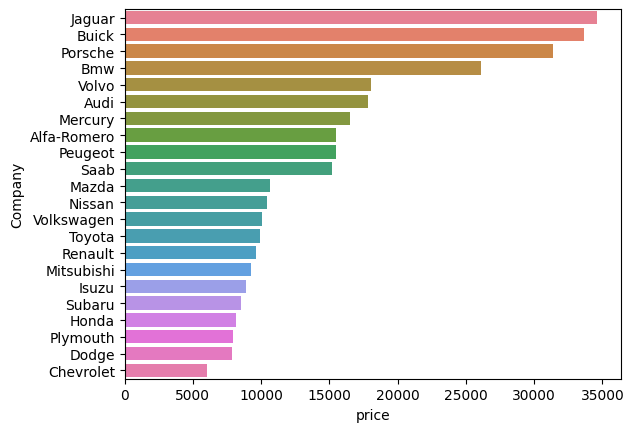

In [ ]:
sns.barplot(avg_price_company, x="price", y="Company",hue='Company')

###**Average price by Categorical columns**

<Axes: xlabel='price', ylabel='fueltype'>

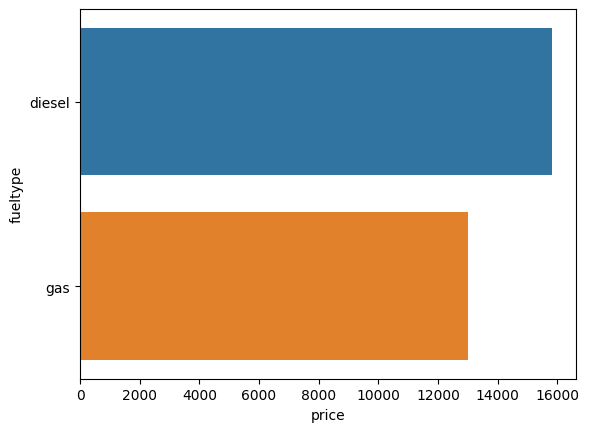

In [ ]:
avg_price_fueltype = df.groupby(['fueltype'])['price'].mean().reset_index()
sns.barplot(avg_price_fueltype, x="price", y="fueltype",hue='fueltype')

<Axes: xlabel='price', ylabel='aspiration'>

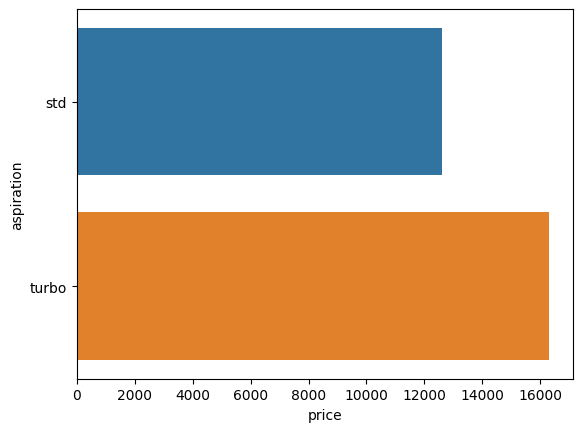

In [ ]:
avg_price_aspiration = df.groupby(['aspiration'])['price'].mean().reset_index()
sns.barplot(avg_price_aspiration, x="price", y="aspiration",hue='aspiration')

<Axes: xlabel='price', ylabel='doornumber'>

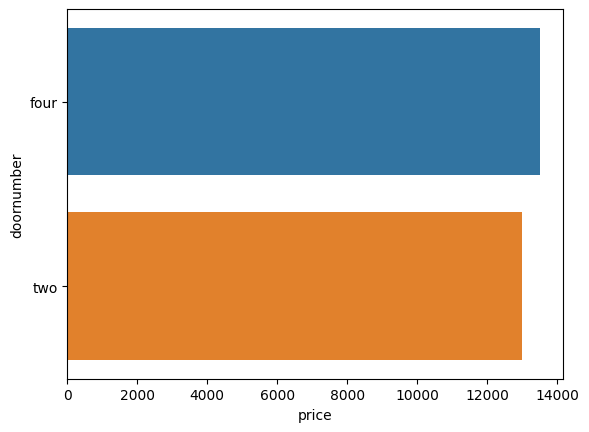

In [ ]:
avg_price_doornumber = df.groupby(['doornumber'])['price'].mean().reset_index()
sns.barplot(avg_price_doornumber, x="price", y="doornumber",hue='doornumber')

<Axes: xlabel='price', ylabel='carbody'>

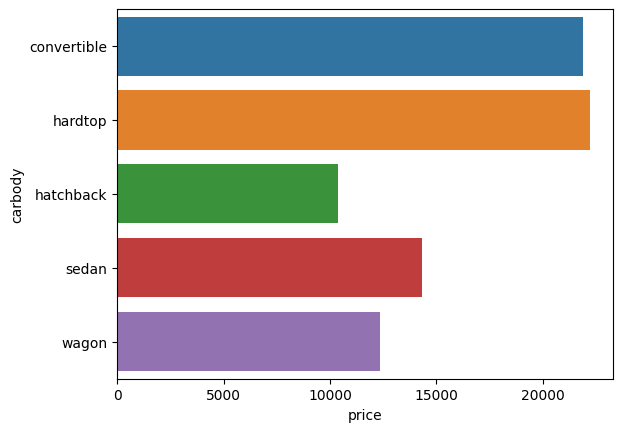

In [ ]:
avg_price_carbody = df.groupby(['carbody'])['price'].mean().reset_index()
sns.barplot(avg_price_carbody, x="price", y="carbody",hue='carbody')

<Axes: xlabel='price', ylabel='drivewheel'>

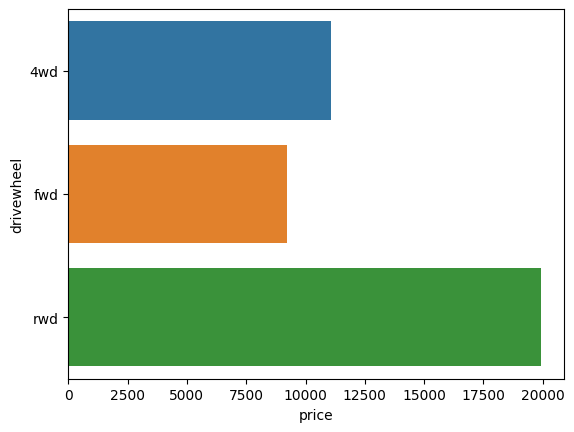

In [ ]:
avg_price_drivewheel = df.groupby(['drivewheel'])['price'].mean().reset_index()
sns.barplot(avg_price_drivewheel, x="price", y="drivewheel",hue='drivewheel')

<Axes: xlabel='price', ylabel='cylindernumber'>

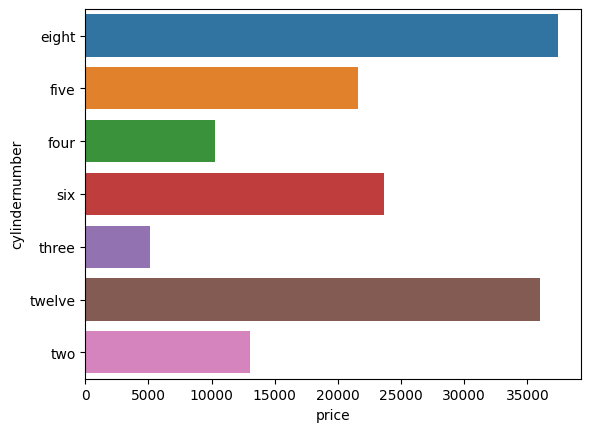

In [ ]:
avg_price_cylindernumber = df.groupby(['cylindernumber'])['price'].mean().reset_index()
sns.barplot(avg_price_cylindernumber, x="price", y="cylindernumber",hue='cylindernumber')

<Axes: xlabel='price', ylabel='enginetype'>

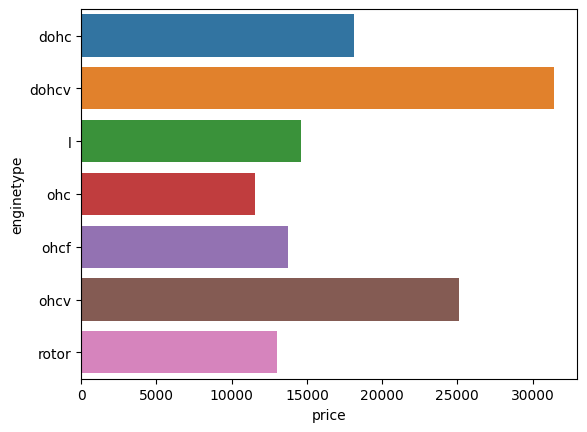

In [ ]:
avg_price_enginetype = df.groupby(['enginetype'])['price'].mean().reset_index()
sns.barplot(avg_price_enginetype, x="price", y="enginetype",hue='enginetype')

<Axes: xlabel='price', ylabel='fuelsystem'>

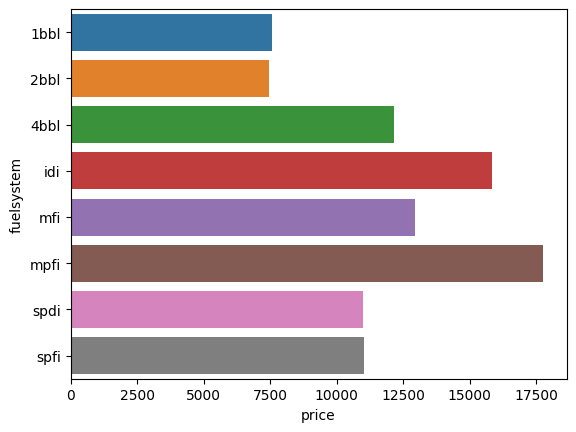

In [ ]:
avg_price_fuelsystem = df.groupby(['fuelsystem'])['price'].mean().reset_index()
sns.barplot(avg_price_fuelsystem, x="price", y="fuelsystem",hue='fuelsystem')

In the categorical columns, it seems that doornumber has no difference in price.

###**Correlation**

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

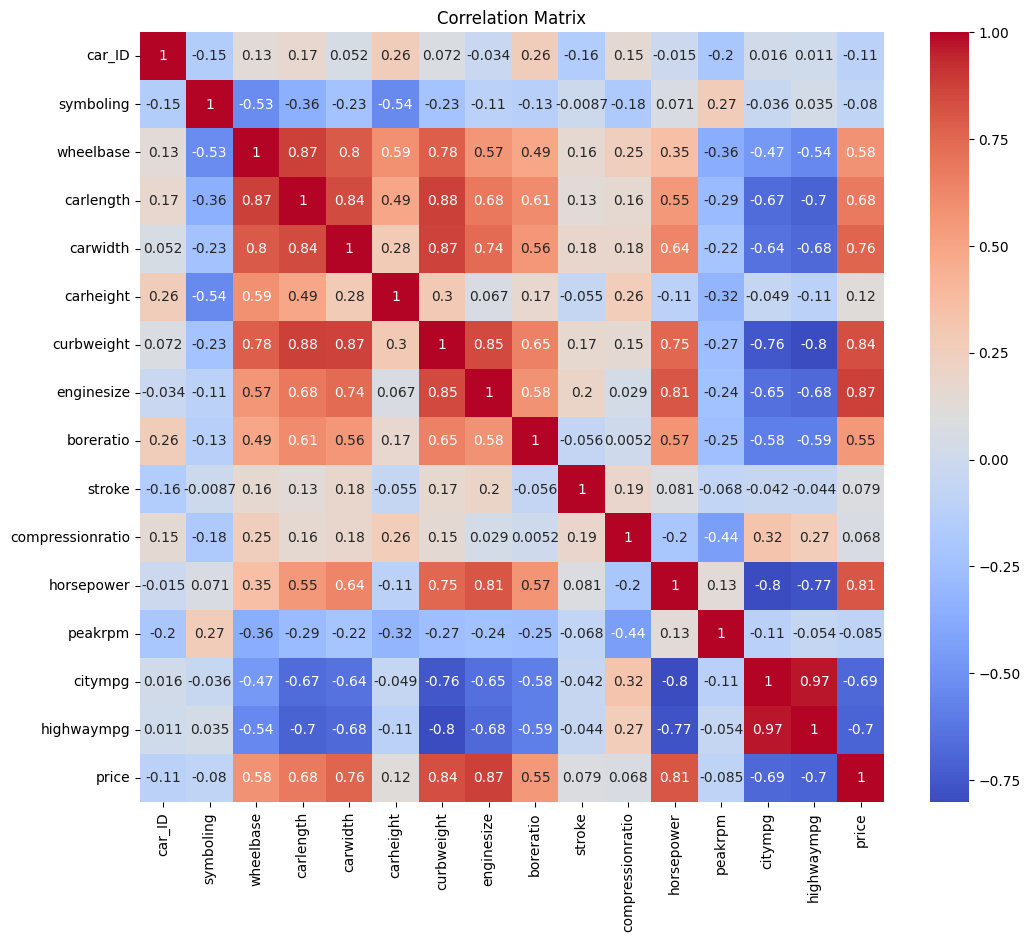

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Car_ID column seem not useful. Let's delete it from the dataframe and run correlation again.

In [ ]:
del df['car_ID']

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

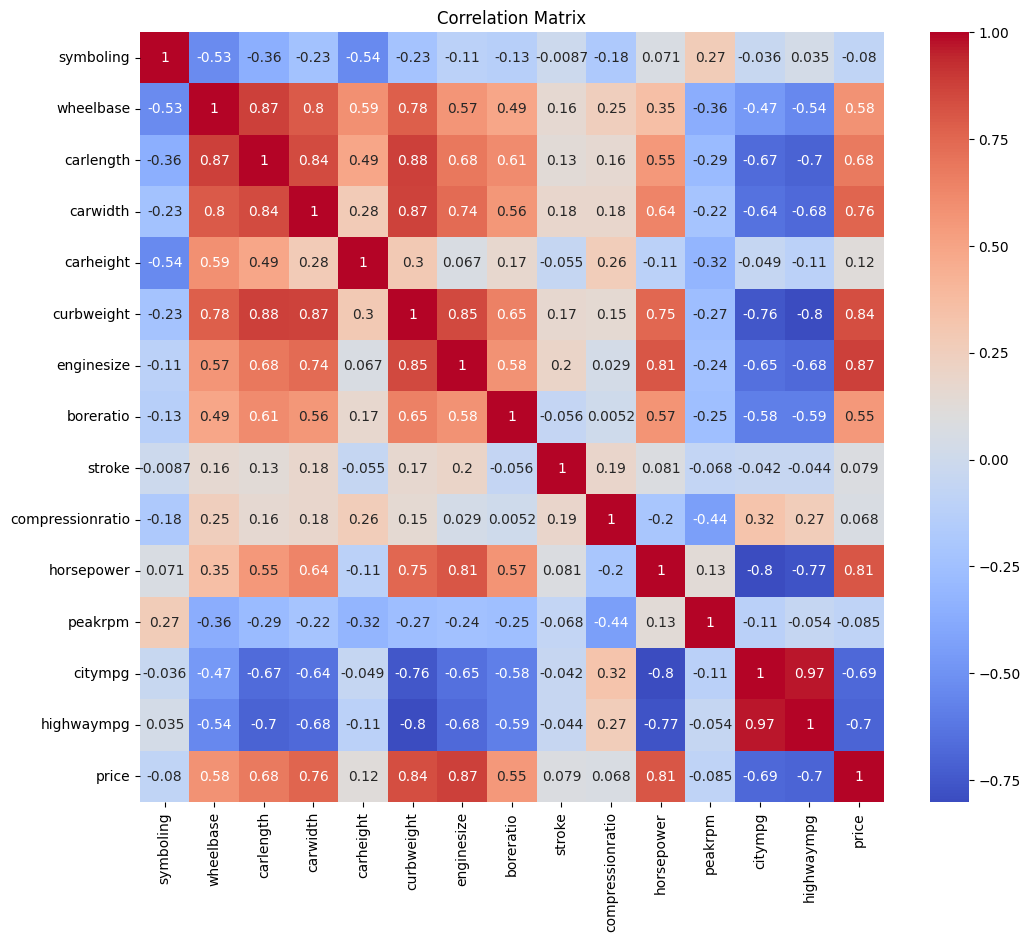

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In numerical columns:


*   symboling, carheight, stroke, compressionratio, peakrpm columns seem not to have any correlation with price.


**Let's create a new dataframe without cols seem not to have any influence on price**

In [ ]:
numerical_cols = df[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']]

In [ ]:
numerical_cols.head(3)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0


In [ ]:
categorical_cols = df[['CarName','Model','Company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype',
                       'cylindernumber','fuelsystem']]

In [ ]:
categorical_cols.head(3)

,CarName,Model,Company,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,giulia,Alfa-Romero,gas,std,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,stelvio,Alfa-Romero,gas,std,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,Quadrifoglio,Alfa-Romero,gas,std,hatchback,rwd,front,ohcv,six,mpfi


In [ ]:
df2 = df[['price','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg'
,'fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]

In [ ]:
df2.head(2)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,gas,std,convertible,rwd,front,dohc,four,mpfi


In [ ]:
df2['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df2.replace({'cylindernumber': {'four': 4
                                ,'six': 6
                                ,'five' : 5
                                ,'three': 3
                                ,'twelve': 12
                                ,'two': 2
                                ,'eight': 8}}, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   wheelbase       205 non-null    float64
 2   carlength       205 non-null    float64
 3   carwidth        205 non-null    float64
 4   curbweight      205 non-null    int64  
 5   enginesize      205 non-null    int64  
 6   boreratio       205 non-null    float64
 7   horsepower      205 non-null    int64  
 8   citympg         205 non-null    int64  
 9   highwaympg      205 non-null    int64  
 10  fueltype        205 non-null    object 
 11  aspiration      205 non-null    object 
 12  carbody         205 non-null    object 
 13  drivewheel      205 non-null    object 
 14  enginelocation  205 non-null    object 
 15  enginetype      205 non-null    object 
 16  cylindernumber  205 non-null    int64  
 17  fuelsystem      205 non-null    obj

In [ ]:
df2.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

##**Data Processing**

In [ ]:
one_hot_coded = pd.get_dummies(df2[['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']])

In [ ]:
new_df2 = pd.get_dummies(df2,columns = ['fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem'])

In [ ]:
new_df2.head(5)

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,21,27,...,False,False,False,False,False,False,False,True,False,False
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,19,26,...,True,False,False,False,False,False,False,True,False,False
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,24,30,...,False,False,False,False,False,False,False,True,False,False
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,18,22,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
new_df2.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'cylindernumber', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']


In [ ]:
new_df2[num_cols] = scaler.fit_transform(new_df2[num_cols])

In [ ]:
x = new_df2.drop(columns=["price"])
y = new_df2["price"]

In [ ]:
x.shape

(205, 39)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (164, 39)
x_test - >   (41, 39)
y_train - >   (164,)
y_test - >   (41,)


In [ ]:
x_train.head(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,1.022697,0.077250,0.089812,0.278074,0.170739,0.371023,-0.814171,0.885740,1.200761,4,...,False,False,False,False,False,True,False,False,False,False
111,1.522109,1.027916,1.164596,1.000049,-0.166277,0.482059,-0.231119,-0.953012,-0.982764,4,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'cylindernumber',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [ ]:
x_train.shape[0]

164

#**Model building with EDA df**

Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

where:

n = count of rows in your dataset used for train or test

p = count of independent variables

In [ ]:
training_r2score = []
testing_r2score = []
training_adj_r2score = []
testing_adj_r2score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    c = (1-((1-a/100)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))*100
    d = (1-((1-b/100)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))*100
    training_r2score.append(a)
    testing_r2score.append(b)
    training_adj_r2score.append(c)
    testing_adj_r2score.append(d)

    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"adj_r2_Score of {model} model on Training Data is:",c)
    print(f"adj_r2_Score of {model} model on Testing Data is:",d)


**Linear Regression Model**


In [ ]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 92.24294867152291
r2_Score of LinearRegression() model on Testing Data is: 79.98825274261449
adj_r2_Score of LinearRegression() model on Training Data is: 89.80323091498576
adj_r2_Score of LinearRegression() model on Testing Data is: -700.4698902954201


In [ ]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86411858417942
r2_Score of DecisionTreeRegressor() model on Testing Data is: 89.95832005322437
adj_r2_Score of DecisionTreeRegressor() model on Training Data is: 99.8213816872681
adj_r2_Score of DecisionTreeRegressor() model on Testing Data is: -301.6671978710251


In [ ]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.60528437164304
r2_Score of RandomForestRegressor() model on Testing Data is: 95.50014139380957
adj_r2_Score of RandomForestRegressor() model on Training Data is: 98.16662381111142
adj_r2_Score of RandomForestRegressor() model on Testing Data is: -79.99434424761729


In [ ]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.41259071036359
r2_Score of AdaBoostRegressor() model on Testing Data is: 89.4444759696478
adj_r2_Score of AdaBoostRegressor() model on Training Data is: 93.96977649830052
adj_r2_Score of AdaBoostRegressor() model on Testing Data is: -322.22096121408816


In [ ]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.30904972716513
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.23244401250899
adj_r2_Score of GradientBoostingRegressor() model on Training Data is: 99.09173472199933
adj_r2_Score of GradientBoostingRegressor() model on Testing Data is: -210.70223949964014


In [ ]:
model_prediction(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 299
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 19
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.8640378394656
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_r

In [ ]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x7c657b2fdde0> model on Training Data is: 99.68998900316221
r2_Score of <catboost.core.CatBoostRegressor object at 0x7c657b2fdde0> model on Testing Data is: 94.76788930595897
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x7c657b2fdde0> model on Training Data is: 99.59248554447937
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x7c657b2fdde0> model on Testing Data is: -109.28442776164103


In [ ]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","LGBM","XGBoost","CatBoost"]

In [ ]:
result_1 = pd.DataFrame({"Algorithms":models,
                   "Training R2_Score":training_r2score,
                   "Testing R2_Score":testing_r2score,
                   "Training adjusted_R2_Score":training_adj_r2score,
                   "Testing adjusted_R2_Score":testing_adj_r2score     }

                        )

In [ ]:
result_1

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,92.242949,79.988253,89.803231,-700.469890
1,Decision Tree,99.864119,89.958320,99.821382,-301.667198
2,Random Forest,98.605284,95.500141,98.166624,-79.994344
3,Ada Boost,95.412591,89.444476,93.969776,-322.220961
4,Gradient Boost,99.309050,92.232444,99.091735,-210.702239
5,LGBM,95.130191,85.666847,93.598557,-473.326116
6,XGBoost,99.864038,92.744695,99.821276,-190.212206
7,CatBoost,99.689989,94.767889,99.592486,-109.284428


#**RFE**

In [ ]:
df3 = df.copy()

In [ ]:
df3.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa-Romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa-Romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa-Romero,Quadrifoglio


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
del df3['Company']
del df3['Model']
del df3['CarName']

In [ ]:
one_hot_coded = pd.get_dummies(df3[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']])

In [ ]:
new_df3 = pd.get_dummies(df3,columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [ ]:
new_df3.head(1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
new_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [ ]:
num_cols = ['symboling','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','stroke','horsepower','peakrpm',
            'citympg','highwaympg']

In [ ]:
new_df3[num_cols] = scaler.fit_transform(new_df3[num_cols])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
from sklearn.feature_selection import RFE

In [ ]:
x1 = new_df3.drop(columns=["price"])
y1 = new_df3["price"]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [ ]:
n_features_to_select = 15
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(x1_train, y1_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=15)

In [ ]:
from operator import itemgetter
features = x1_train.columns.to_list()
for x1, y1 in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x1, y1)

1 wheelbase
1 carlength
1 carwidth
1 carheight
1 curbweight
1 enginesize
1 boreratio
1 stroke
1 compressionratio
1 horsepower
1 peakrpm
1 citympg
1 highwaympg
1 carbody_sedan
1 drivewheel_rwd
2 aspiration_turbo
3 carbody_convertible
4 fuelsystem_mpfi
5 carbody_hatchback
6 symboling
7 cylindernumber_four
8 carbody_hardtop
9 aspiration_std
10 drivewheel_fwd
11 cylindernumber_six
12 enginetype_ohc
13 fuelsystem_2bbl
14 doornumber_four
15 carbody_wagon
16 enginetype_dohc
17 doornumber_two
18 fueltype_diesel
19 enginetype_ohcv
20 cylindernumber_five
21 fueltype_gas
22 fuelsystem_spdi
23 fuelsystem_idi
24 enginetype_ohcf
25 enginetype_l
26 drivewheel_4wd
27 cylindernumber_eight
28 fuelsystem_mfi
29 enginelocation_front
30 cylindernumber_two
31 enginelocation_rear
32 enginetype_rotor
33 fuelsystem_spfi
34 enginetype_dohcv
35 fuelsystem_4bbl
36 fuelsystem_1bbl
37 cylindernumber_twelve
38 cylindernumber_three


Create a new dataframe with top 15 high-ranking features only.

In [ ]:
df4 = new_df3[['price', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio'
,'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','enginetype_ohc']]

In [ ]:
df4.head(3)

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,enginetype_ohc
0,13495.0,1.743470,-1.690772,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.519071,-1.839377,9.0,0.174483,-0.26296,-0.646553,-0.546059,False
1,16500.0,1.743470,-1.690772,-0.426521,-0.844782,48.8,-0.014566,0.074449,0.519071,-1.839377,9.0,0.174483,-0.26296,-0.646553,-0.546059,False
2,16500.0,0.133509,-0.708596,-0.231513,-0.190566,52.4,0.514882,0.604046,-2.404880,0.685946,9.0,1.264536,-0.26296,-0.953012,-0.691627,False


In [ ]:
x2 = df4.drop(columns=["price"])
y2 = df4["price"]

In [ ]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [ ]:
training_r2score2 = []
testing_r2score2 = []
training_adj_r2score2 = []
testing_adj_r2score2 = []

In [ ]:
training_r2score2 = []
testing_r2score2 = []
training_adj_r2score2 = []
testing_adj_r2score2 = []
def model_prediction2(model):
    model.fit(x2_train,y2_train)
    x2_train_pred = model.predict(x2_train)
    x2_test_pred = model.predict(x2_test)
    a2 = r2_score(y2_train,x2_train_pred)*100
    b2 = r2_score(y2_test,x2_test_pred)*100
    c2 = (1-((1-a2/100)*(x2_train.shape[0]-1))/(x2_train.shape[0]-x2_train.shape[1]-1))*100
    d2 = (1-((1-b2/100)*(x2_test.shape[0]-1))/(x2_test.shape[0]-x2_test.shape[1]-1))*100
    training_r2score2.append(a2)
    testing_r2score2.append(b2)
    training_adj_r2score2.append(c2)
    testing_adj_r2score2.append(d2)

    print(f"r2_Score of {model} model on Training Data is:",a2)
    print(f"r2_Score of {model} model on Testing Data is:",b2)
    print(f"adj_r2_Score of {model} model on Training Data is:",c2)
    print(f"adj_r2_Score of {model} model on Testing Data is:",d2)



In [ ]:
model_prediction2(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 86.64704919218896
r2_Score of LinearRegression() model on Testing Data is: 81.8120312721293
adj_r2_Score of LinearRegression() model on Training Data is: 85.29370958328919
adj_r2_Score of LinearRegression() model on Testing Data is: 70.8992500354069


In [ ]:
model_prediction2(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.83023910011116
r2_Score of DecisionTreeRegressor() model on Testing Data is: 89.03651962004358
adj_r2_Score of DecisionTreeRegressor() model on Training Data is: 99.81303360350081
adj_r2_Score of DecisionTreeRegressor() model on Testing Data is: 82.45843139206971


In [ ]:
model_prediction2(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.58056325474105
r2_Score of RandomForestRegressor() model on Testing Data is: 95.9341486255088
adj_r2_Score of RandomForestRegressor() model on Training Data is: 98.43670142245129
adj_r2_Score of RandomForestRegressor() model on Testing Data is: 93.49463780081408


In [ ]:
model_prediction2(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.57311347573454
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.9562918514056
adj_r2_Score of AdaBoostRegressor() model on Training Data is: 95.12444254422114
adj_r2_Score of AdaBoostRegressor() model on Testing Data is: 85.53006696224894


In [ ]:
model_prediction2(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.27622138331952
r2_Score of GradientBoostingRegressor() model on Testing Data is: 93.08682916036521
adj_r2_Score of GradientBoostingRegressor() model on Training Data is: 99.20286544243973
adj_r2_Score of GradientBoostingRegressor() model on Testing Data is: 88.93892665658434


In [ ]:
model_prediction2(LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 15
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
model_prediction2(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 99.83019793450708
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

In [ ]:
model_prediction2(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x7c6577d03af0> model on Training Data is: 99.69655440661612
r2_Score of <catboost.core.CatBoostRegressor object at 0x7c6577d03af0> model on Testing Data is: 91.87518842841243
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x7c6577d03af0> model on Training Data is: 99.66579978566504
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x7c6577d03af0> model on Testing Data is: 87.00030148545987


In [ ]:
result_2 = pd.DataFrame({"Algorithms":models,
                   "Training R2_Score":training_r2score2,
                   "Testing R2_Score":testing_r2score2,
                   "Training adjusted_R2_Score":training_adj_r2score2,
                   "Testing adjusted_R2_Score":testing_adj_r2score2     }

                        )

In [ ]:
result_2

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,86.647049,81.812031,85.293710,70.899250
1,Decision Tree,99.830239,89.036520,99.813034,82.458431
2,Random Forest,98.580563,95.934149,98.436701,93.494638
3,Ada Boost,95.573113,90.956292,95.124443,85.530067
4,Gradient Boost,99.276221,93.086829,99.202865,88.938927
5,LGBM,96.046103,85.640658,95.645370,77.025053
6,XGBoost,99.830198,93.470528,99.812988,89.552845
7,CatBoost,99.696554,91.875188,99.665800,87.000301


#**Using VIF**

In [ ]:
x2_train_1 = sm.add_constant(x2_train)
model = sm.OLS(y2_train, x2_train.astype(float)).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              282.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                   3.15e-101
Time:                        17:02:17   Log-Likelihood:                         -1535.7
No. Observations:                 164   AIC:                                      3101.
Df Residuals:                     149   BIC:                                      3148.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x2_train.columns
vif['VIF'] = [variance_inflation_factor(x2_train.astype(float).values, i) for i in range(x2_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,citympg,26.13
4,carheight,24.53
13,highwaympg,20.81
9,compressionratio,18.13
5,curbweight,16.04
2,carlength,8.49
1,wheelbase,8.08
10,horsepower,7.84
14,enginetype_ohc,7.00
6,enginesize,6.48


In [ ]:
x = x2_train.drop(columns=["highwaympg"])

In [ ]:
x_train_lm_1 = sm.add_constant(x)

lr_1 = sm.OLS(y2_train, x_train_lm_1.astype(float)).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     68.69
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.35e-57
Time:                        17:02:17   Log-Likelihood:                -1536.1
No. Observations:                 164   AIC:                             3102.
Df Residuals:                     149   BIC:                             3149.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -948.8653   7597.143  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carheight,24.47
9,compressionratio,18.09
5,curbweight,15.62
2,carlength,8.20
1,wheelbase,7.85
10,horsepower,7.41
12,citympg,7.14
13,enginetype_ohc,6.79
6,enginesize,6.37
3,carwidth,5.01


In [ ]:
x = x.drop(columns=["curbweight"])

In [ ]:
x_train_lm_2 = sm.add_constant(x)

lr_2 = sm.OLS(y2_train, x_train_lm_2.astype(float)).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     74.13
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           2.06e-58
Time:                        17:02:17   Log-Likelihood:                -1536.4
No. Observations:                 164   AIC:                             3101.
Df Residuals:                     150   BIC:                             3144.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1481.2602   7555.210  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carheight,23.84
8,compressionratio,16.08
2,carlength,7.56
1,wheelbase,7.34
9,horsepower,7.26
12,enginetype_ohc,6.38
11,citympg,5.93
5,enginesize,5.26
3,carwidth,4.95
10,peakrpm,2.05


In [ ]:
x = x.drop(columns=["carheight"])

In [ ]:
x_train_lm_3 = sm.add_constant(x)

lr_3 = sm.OLS(y2_train, x_train_lm_3.astype(float)).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     80.00
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           4.38e-59
Time:                        17:02:18   Log-Likelihood:                -1537.2
No. Observations:                 164   AIC:                             3100.
Df Residuals:                     151   BIC:                             3141.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7226.0057   1128.591  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,7.30
1,wheelbase,7.28
8,horsepower,7.23
4,enginesize,5.20
3,carwidth,4.80
10,citympg,4.34
11,enginetype_ohc,3.82
7,compressionratio,3.54
5,boreratio,2.00
9,peakrpm,1.99


In [ ]:
x = x.drop(columns=["carlength"])

In [ ]:
x_train_lm_4 = sm.add_constant(x)

lr_4 = sm.OLS(y2_train, x_train_lm_4.astype(float)).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     86.88
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.43e-60
Time:                        17:02:18   Log-Likelihood:                -1538.0
No. Observations:                 164   AIC:                             3100.
Df Residuals:                     152   BIC:                             3137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7529.5757   1102.030  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,horsepower,7.22
3,enginesize,5.18
1,wheelbase,5.02
2,carwidth,4.59
10,enginetype_ohc,3.82
9,citympg,3.79
6,compressionratio,3.53
4,boreratio,1.99
8,peakrpm,1.96
0,symboling,1.88


In [ ]:
x = x.drop(columns=["boreratio"])

In [ ]:
x_train_lm_5 = sm.add_constant(x)

lr_5 = sm.OLS(y2_train, x_train_lm_5.astype(float)).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     96.19
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.38e-61
Time:                        17:02:18   Log-Likelihood:                -1538.0
No. Observations:                 164   AIC:                             3098.
Df Residuals:                     153   BIC:                             3132.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7532.0190   1098.082  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,horsepower,6.94
3,enginesize,5.17
1,wheelbase,4.99
2,carwidth,4.59
9,enginetype_ohc,3.74
8,citympg,3.64
5,compressionratio,3.49
0,symboling,1.88
7,peakrpm,1.78
4,stroke,1.21


In [ ]:
x = x.drop(columns=["symboling"])

In [ ]:
x_train_lm_6 = sm.add_constant(x)

lr_6 = sm.OLS(y2_train, x_train_lm_6.astype(float)).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.51e-61
Time:                        17:02:18   Log-Likelihood:                -1538.5
No. Observations:                 164   AIC:                             3097.
Df Residuals:                     154   BIC:                             3128.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7481.8052   1097.373  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,horsepower,6.83
2,enginesize,5.17
1,carwidth,4.35
8,enginetype_ohc,3.61
4,compressionratio,3.34
7,citympg,3.31
0,wheelbase,3.21
6,peakrpm,1.78
3,stroke,1.20


In [ ]:
x = x.drop(columns=["horsepower"])

In [ ]:
x_train_lm_7 = sm.add_constant(x)

lr_7 = sm.OLS(y2_train, x_train_lm_7.astype(float)).fit()

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           4.65e-62
Time:                        17:02:18   Log-Likelihood:                -1539.9
No. Observations:                 164   AIC:                             3098.
Df Residuals:                     155   BIC:                             3126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7416.0502   1101.966  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,4.14
7,enginetype_ohc,3.54
4,compressionratio,3.27
0,wheelbase,2.86
2,enginesize,2.85
6,citympg,2.39
5,peakrpm,1.48
3,stroke,1.19


In [ ]:
x = x.drop(columns=["wheelbase"])

In [ ]:
x_train_lm_8 = sm.add_constant(x)

lr_8 = sm.OLS(y2_train, x_train_lm_8.astype(float)).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           4.38e-63
Time:                        17:02:18   Log-Likelihood:                -1540.0
No. Observations:                 164   AIC:                             3096.
Df Residuals:                     156   BIC:                             3121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7378.6663   1096.993  

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.astype(float).values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,3.53
3,compressionratio,3.26
1,enginesize,2.73
5,citympg,2.38
0,carwidth,2.37
4,peakrpm,1.29
2,stroke,1.17


In [ ]:
df5=new_df3[['enginetype_ohc','compressionratio','enginesize','citympg','carwidth','peakrpm','stroke','price']]

In [ ]:
x3 = df5.drop(columns=["price"])
y3 = df5["price"]

In [ ]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=42)

In [ ]:
training_r2score3 = []
testing_r2score3 = []
training_adj_r2score3 = []
testing_adj_r2score3 = []
def model_prediction3(model):
    model.fit(x3_train,y3_train)
    x3_train_pred = model.predict(x3_train)
    x3_test_pred = model.predict(x3_test)
    a3 = r2_score(y3_train,x3_train_pred)*100
    b3 = r2_score(y3_test,x3_test_pred)*100
    c3 = (1-((1-a3/100)*(x3_train.shape[0]-1))/(x3_train.shape[0]-x3_train.shape[1]-1))*100
    d3 = (1-((1-b3/100)*(x3_test.shape[0]-1))/(x3_test.shape[0]-x3_test.shape[1]-1))*100
    training_r2score3.append(a3)
    testing_r2score3.append(b3)
    training_adj_r2score3.append(c3)
    testing_adj_r2score3.append(d3)

    print(f"r2_Score of {model} model on Training Data is:",a3)
    print(f"r2_Score of {model} model on Testing Data is:",b3)
    print(f"adj_r2_Score of {model} model on Training Data is:",c3)
    print(f"adj_r2_Score of {model} model on Testing Data is:",d3)

In [ ]:
model_prediction3(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 85.92811233203797
r2_Score of LinearRegression() model on Testing Data is: 79.29536889529474
adj_r2_Score of LinearRegression() model on Training Data is: 85.29668147514224
adj_r2_Score of LinearRegression() model on Testing Data is: 74.90347744884211


In [ ]:
model_prediction3(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 98.68931630942761
r2_Score of DecisionTreeRegressor() model on Testing Data is: 89.62847756820814
adj_r2_Score of DecisionTreeRegressor() model on Training Data is: 98.63050357972244
adj_r2_Score of DecisionTreeRegressor() model on Testing Data is: 87.42845765843411


In [ ]:
model_prediction3(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 97.63730936167987
r2_Score of RandomForestRegressor() model on Testing Data is: 95.06658809062657
adj_r2_Score of RandomForestRegressor() model on Training Data is: 97.53129119201166
adj_r2_Score of RandomForestRegressor() model on Testing Data is: 94.02010677651705


In [ ]:
model_prediction3(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 92.47177273722981
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.5932165432555
adj_r2_Score of AdaBoostRegressor() model on Training Data is: 92.13396766774655
adj_r2_Score of AdaBoostRegressor() model on Testing Data is: 88.59783823424908


In [ ]:
model_prediction3(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 98.08048938241024
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.12337668275173
adj_r2_Score of GradientBoostingRegressor() model on Training Data is: 97.9943574957235
adj_r2_Score of GradientBoostingRegressor() model on Testing Data is: 90.45257779727481


In [ ]:
model_prediction3(LGBMRegressor())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 7
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
model_prediction3(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on Training Data is: 98.68930429107236
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_

In [ ]:
model_prediction3(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x7c65777e72e0> model on Training Data is: 98.60554449093935
r2_Score of <catboost.core.CatBoostRegressor object at 0x7c65777e72e0> model on Testing Data is: 90.78409055472795
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x7c65777e72e0> model on Training Data is: 98.54297276937895
adj_r2_Score of <catboost.core.CatBoostRegressor object at 0x7c65777e72e0> model on Testing Data is: 88.82920067239752


In [ ]:
result_1

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,92.242949,79.988253,89.803231,-700.469890
1,Decision Tree,99.864119,89.958320,99.821382,-301.667198
2,Random Forest,98.605284,95.500141,98.166624,-79.994344
3,Ada Boost,95.412591,89.444476,93.969776,-322.220961
4,Gradient Boost,99.309050,92.232444,99.091735,-210.702239
5,LGBM,95.130191,85.666847,93.598557,-473.326116
6,XGBoost,99.864038,92.744695,99.821276,-190.212206
7,CatBoost,99.689989,94.767889,99.592486,-109.284428


In [ ]:
result_2

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,86.647049,81.812031,85.293710,70.899250
1,Decision Tree,99.830239,89.036520,99.813034,82.458431
2,Random Forest,98.580563,95.934149,98.436701,93.494638
3,Ada Boost,95.573113,90.956292,95.124443,85.530067
4,Gradient Boost,99.276221,93.086829,99.202865,88.938927
5,LGBM,96.046103,85.640658,95.645370,77.025053
6,XGBoost,99.830198,93.470528,99.812988,89.552845
7,CatBoost,99.696554,91.875188,99.665800,87.000301


In [ ]:
result_3 = pd.DataFrame({"Algorithms":models,
                   "Training R2_Score":training_r2score3,
                   "Testing R2_Score":testing_r2score3,
                   "Training adjusted_R2_Score":training_adj_r2score3,
                   "Testing adjusted_R2_Score":testing_adj_r2score3     }

                        )
result_3

,Algorithms,Training R2_Score,Testing R2_Score,Training adjusted_R2_Score,Testing adjusted_R2_Score
0,Linear Regression,85.928112,79.295369,85.296681,74.903477
1,Decision Tree,98.689316,89.628478,98.630504,87.428458
2,Random Forest,97.637309,95.066588,97.531291,94.020107
3,Ada Boost,92.471773,90.593217,92.133968,88.597838
4,Gradient Boost,98.080489,92.123377,97.994357,90.452578
5,LGBM,94.518224,82.588125,94.272247,78.894697
6,XGBoost,98.689304,92.565108,98.630491,90.988009
7,CatBoost,98.605544,90.784091,98.542973,88.829201
